In [1]:
# With pip:
!pip install facenet-pytorch

# or clone this repo, removing the '-' to allow python imports:
!git clone https://github.com/timesler/facenet-pytorch.git facenet_pytorch

# or use a docker container (see https://github.com/timesler/docker-jupyter-dl-gpu):
#docker run -it --rm timesler/jupyter-dl-gpu pip install facenet-pytorch && ipython

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
fatal: destination path 'facenet_pytorch' already exists and is not an empty directory.


In [2]:
!wget https://github.com/davidsandberg/facenet/raw/master/data/images/Anthony_Hopkins_0002.jpg

--2022-12-17 01:07:06--  https://github.com/davidsandberg/facenet/raw/master/data/images/Anthony_Hopkins_0002.jpg
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/davidsandberg/facenet/master/data/images/Anthony_Hopkins_0002.jpg [following]
--2022-12-17 01:07:06--  https://raw.githubusercontent.com/davidsandberg/facenet/master/data/images/Anthony_Hopkins_0002.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13032 (13K) [image/jpeg]
Saving to: ‘Anthony_Hopkins_0002.jpg.1’

Anthony_Hopkins_000 100%[===================>]  12.73K  --.-KB/s    in 0s      

2022-12-17 01:07:06 (100 MB/s) - ‘Anth

In [1]:

!pip install mtcnn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
# confirm mtcnn was installed correctly
import mtcnn
# print version
print(mtcnn.__version__)

0.1.0


In [7]:
from numpy import asarray
from matplotlib import pyplot
# from mtcnn.mtcnn import MTCNN

In [8]:
# load image from file
from PIL import Image
# image = Image(filename='Anthony_Hopkins_0002.jpg') 
image = Image.open('Anthony_Hopkins_0002.jpg')
# Face Detection: convert to array
face = asarray(image)
face.shape

(250, 250, 3)

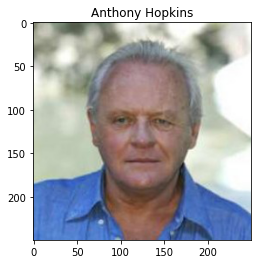

In [5]:
pyplot.imshow(face)
title = 'Anthony Hopkins'
pyplot.title(title)
pyplot.show()

In [9]:
from mtcnn.mtcnn import MTCNN

In [10]:
# create the detector, using default weights
detector = MTCNN()
# detect fetarues of faces in the image
features = detector.detect_faces(face)

1/1 [==============================] - 0s 161ms/step


In [11]:
features

[{'box': [72, 62, 98, 126],
  'confidence': 0.9999877214431763,
  'keypoints': {'left_eye': (102, 113),
   'right_eye': (148, 113),
   'nose': (124, 137),
   'mouth_left': (105, 159),
   'mouth_right': (145, 159)}}]

In [12]:
from facenet_pytorch import MTCNN, InceptionResnetV1

# Create an inception resnet (in eval mode):
resnet = InceptionResnetV1(pretrained='vggface2').eval()

In [15]:
# Get cropped and prewhitened image tensor
mtcnn2 = MTCNN(image_size=1024, margin=32)
image = Image.open('Anthony_Hopkins_0002.jpg')
face_cropped = mtcnn2(image)

# Calculate embedding (unsqueeze to add batch dimension)
face_embedding = resnet(face_cropped.unsqueeze(0))

# Or, if using for VGGFace2 classification
resnet.classify = True
face_classification_probs = resnet(face_cropped.unsqueeze(0))

Face recognition can be divided into multiple steps. The image below shows an example of a face recognition pipeline.

**Face detection** — Detecting one or more faces in an image.

**Feature extraction** — Extracting the most important features from an image of the face.

**Face classification** — Classifying the face based on extracted features.
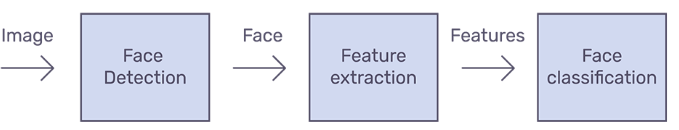

In [16]:
print(face_classification_probs)

tensor([[-0.8664,  0.8475,  0.7197,  ...,  0.0189,  0.8817, -0.3898]],
       grad_fn=<AddmmBackward0>)


In [17]:
print(face_embedding)

tensor([[-0.8664,  0.8475,  0.7197,  ...,  0.0189,  0.8817, -0.3898]],
       grad_fn=<AddmmBackward0>)
